In [9]:
#Necessary packages
import pandas as pd
import numpy as np

#For venn diagrams
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

# 1 Need to import RAiSD files and gff files as dataframes.

In [10]:
#RAiSD 0.1% windows for each pop

South_raisd_df = pd.read_csv('South_Pops_RAiSD_999_percentile_bed.txt', sep="\t", header=None)
South_raisd_df.columns = ["Chr","Start","End"]
#South_raisd_df

Central_raisd_df = pd.read_csv('central_Pops_RAiSD_999_percentile_bed.txt', sep="\t", header=None)
Central_raisd_df.columns = ["Chr","Start","End"]
#Central_raisd_df

North_raisd_df = pd.read_csv('North_Pops_RAiSD_999_percentile_bed.txt', sep="\t", header=None)
North_raisd_df.columns = ["Chr","Start","End"]
#North_raisd_df

In [11]:
#GFF files for American chestnut from HudsonAlpha/Phytozome.
#Importing a dataset for both exon and nonexon gffs

Cdent_gff_df = pd.read_csv('Cdentata_673_v1.1.gene_my_text_AS.gff3/Cdentata_673_v1.1.gene.gff3', sep="\t", skiprows=6,header=None)
Cdent_gff_df.columns = ["Chr", "Software","Type","Start","End","notsure1","notsure2","notsure3","Info"]
Cdent_gff_df

#Cdent_exon_gff_df = pd.read_csv('Cdentata_673_v1.1.gene_my_text_AS.gff3/Cdentata_673_v1.1.gene_exons.gff3', sep="\t", skiprows=6,header=None)
#Cdent_exon_gff_df.columns = ["Chr", "Software","Type","Start","End","notsure1","notsure2","notsure3","Info"]
#Cdent_exon_gff_df

,Chr,Software,Type,Start,End,notsure1,notsure2,notsure3,Info
0,Chr01,phytozomev13,gene,16810,20578,.,+,.,ID=Caden.01G000100.v1.1;Name=Caden.01G000100
1,Chr01,phytozomev13,mRNA,16810,20578,.,+,.,ID=Caden.01G000100.1.v1.1;Name=Caden.01G000100...
2,Chr01,phytozomev13,five_prime_UTR,16810,16921,.,+,.,ID=Caden.01G000100.1.v1.1.five_prime_UTR.1;Par...
3,Chr01,phytozomev13,CDS,16922,16951,.,+,0,ID=Caden.01G000100.1.v1.1.CDS.1;Parent=Caden.0...
4,Chr01,phytozomev13,CDS,17064,17211,.,+,0,ID=Caden.01G000100.1.v1.1.CDS.2;Parent=Caden.0...
...,...,...,...,...,...,...,...,...,...
418558,scaffold_83,phytozomev13,CDS,20501,20578,.,-,0,ID=Caden.M016400.1.v1.1.CDS.4;Parent=Caden.M01...
418559,scaffold_83,phytozomev13,CDS,20111,20450,.,-,0,ID=Caden.M016400.1.v1.1.CDS.5;Parent=Caden.M01...
418560,scaffold_83,phytozomev13,CDS,19874,19909,.,-,2,ID=Caden.M016400.1.v1.1.CDS.6;Parent=Caden.M01...
418561,scaffold_83,phytozomev13,CDS,19701,19825,.,-,2,ID=Caden.M016400.1.v1.1.CDS.7;Parent=Caden.M01...


In [12]:
#Now need to make dataframes where only the genes are included
genes_df = Cdent_gff_df[Cdent_gff_df['Type'] == 'gene']
genes_df

,Chr,Software,Type,Start,End,notsure1,notsure2,notsure3,Info
0,Chr01,phytozomev13,gene,16810,20578,.,+,.,ID=Caden.01G000100.v1.1;Name=Caden.01G000100
10,Chr01,phytozomev13,gene,62221,67228,.,+,.,ID=Caden.01G000200.v1.1;Name=Caden.01G000200
24,Chr01,phytozomev13,gene,67335,68351,.,-,.,ID=Caden.01G000300.v1.1;Name=Caden.01G000300
29,Chr01,phytozomev13,gene,69998,93550,.,-,.,ID=Caden.01G000400.v1.1;Name=Caden.01G000400
37,Chr01,phytozomev13,gene,147012,149051,.,-,.,ID=Caden.01G000500.v1.1;Name=Caden.01G000500
...,...,...,...,...,...,...,...,...,...
418520,scaffold_79,phytozomev13,gene,3036,3491,.,-,.,ID=Caden.M016000.v1.1;Name=Caden.M016000
418525,scaffold_79,phytozomev13,gene,4137,6215,.,-,.,ID=Caden.M016100.v1.1;Name=Caden.M016100
418531,scaffold_79,phytozomev13,gene,14012,22919,.,+,.,ID=Caden.M016200.v1.1;Name=Caden.M016200
418546,scaffold_80,phytozomev13,gene,2942,5508,.,-,.,ID=Caden.M016300.v1.1;Name=Caden.M016300


# 2 Find which genes are located inside or within 1kb of the RAiSD windows

In [13]:
#South

#Iterating through entire gene df
#First need to get list of row numbers for gene_df
row_list = genes_df.index.tolist()

#Initialize south pop gene list
South_gene_list = []

#For loop to iterate through both pop and gene dataframes
for j in range(len(South_raisd_df['Chr'])):
    #This is really inefficient, however, for each row in the RAiSD pop df, it will look through all genes to see if there is a match
    for i in row_list:
        if (genes_df.at[i,'Chr'] == South_raisd_df.at[j,'Chr']) and (genes_df.at[i,'Start'] >= (South_raisd_df.at[j,'Start'] - 1000)) and (genes_df.at[i,'End'] <= (South_raisd_df.at[j,'End'] + 1000)): 
            
            South_gene_list.append(genes_df.at[i,'Info'])
            break #This should move on to the next row in South_RAiSD if a match is found, so as not to continue through all gene list


In [14]:
#Central

#Iterating through entire gene df
#First need to get list of row numbers for gene_df
row_list = genes_df.index.tolist()

#Initialize south pop gene list
Central_gene_list = []

#For loop to iterate through both pop and gene dataframes
for j in range(len(Central_raisd_df['Chr'])):
    #This is really inefficient, however, for each row in the RAiSD pop df, it will look through all genes to see if there is a match
    for i in row_list:
        if (genes_df.at[i,'Chr'] == Central_raisd_df.at[j,'Chr']) and (genes_df.at[i,'Start'] >= (Central_raisd_df.at[j,'Start'] - 1000)) and (genes_df.at[i,'End'] <= (Central_raisd_df.at[j,'End'] + 1000)): 
            
            Central_gene_list.append(genes_df.at[i,'Info'])
            break #This should move on to the next row in Central_RAiSD if a match is found, so as not to continue on list


In [15]:
#North

#Iterating through entire gene df
#First need to get list of row numbers for gene_df
row_list = genes_df.index.tolist()

#Initialize south pop gene list
North_gene_list = []

#For loop to iterate through both pop and gene dataframes
for j in range(len(North_raisd_df['Chr'])):
    #This is really inefficient, however, for each row in the RAiSD pop df, it will look through all genes to see if there is a match
    for i in row_list:
        if (genes_df.at[i,'Chr'] == North_raisd_df.at[j,'Chr']) and (genes_df.at[i,'Start'] >= (North_raisd_df.at[j,'Start'] - 1000)) and (genes_df.at[i,'End'] <= (North_raisd_df.at[j,'End'] + 1000)): 
            
            North_gene_list.append(genes_df.at[i,'Info'])
            break #This should move on to the next row in North_RAiSD if a match is found, so as not to continue on list


In [16]:
for i in South_gene_list:
    print(i)

ID=Caden.01G022200.v1.1;Name=Caden.01G022200
ID=Caden.01G022200.v1.1;Name=Caden.01G022200
ID=Caden.01G022200.v1.1;Name=Caden.01G022200
ID=Caden.01G022200.v1.1;Name=Caden.01G022200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.01G035200.v1.1;Name=Caden.01G035200
ID=Caden.0

ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.04G027400.v1.1;Name=Caden.04G027400
ID=Caden.0

ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035100.v1.1;Name=Caden.06G035100
ID=Caden.06G035200.v1.1;Name=Caden.06G035200
ID=Caden.06G035200.v1.1;Name=Caden.06G035200
ID=Caden.06G035200.v1.1;Name=Caden.06G035200
ID=Caden.06G035200.v1.1;Name=Caden.06G035200
ID=Caden.0

ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.11G042700.v1.1;Name=Caden.11G042700
ID=Caden.1

In [17]:
print(len(South_gene_list))

10238


In [18]:
#Each list has genes that are listed more than once since some of the locations in the populations are linked and/or overlapp.
#So, now I need to get a list for each population with only unique genes, not duplicates within each pop

#First converting the list to a set, which only retains unique values
South_gene_set = set(South_gene_list)
Central_gene_set = set(Central_gene_list)
North_gene_set = set(North_gene_list)

#Now converting set back to list so that I have a list of unique values
South_genes_unique_list = list(South_gene_set)
Central_genes_unique_list = list(Central_gene_set)
North_genes_unique_list = list(North_gene_set)


print(len(South_genes_unique_list))
print(len(Central_genes_unique_list))
print(len(North_genes_unique_list))

617
536
566


# 3. Make a dataframe with the gene definitions for the genes found in each pop

In [19]:
#Import the 'defline' txt file that has the info for each gene
defline_df = pd.read_csv('Cdentata_673_v1.1.defline.txt', sep="\t",header=None)
defline_df.columns = ["Gene", "Source","Gene_info"]
defline_df

,Gene,Source,Gene_info
0,Caden.01G000100.1,pdef,(1 of 1) PTHR11760//PTHR11760:SF22 - 30S/40S R...
1,Caden.01G000200.1,pdef,(1 of 1) K18787 - thermospermine synthase (ACL5)
2,Caden.01G000300.1,pdef,(1 of 2) PTHR34455:SF1 - EXPRESSED PROTEIN
3,Caden.01G000400.1,pdef,(1 of 1) PTHR31618:SF3 - MECHANOSENSITIVE ION ...
4,Caden.01G000600.1,pdef,(1 of 2) 3.5.1.3 - Omega-amidase
...,...,...,...
38201,Caden.M015900.2,pdef,(1 of 3) PTHR22600//PTHR22600:SF18 - BETA-HEXO...
38202,Caden.M016000.1,pdef,(1 of 492) PF01535 - PPR repeat (PPR)
38203,Caden.M016100.1,pdef,(1 of 556) PF13041 - PPR repeat family (PPR_2)
38204,Caden.M016200.1,pdef,(1 of 3) K12479 - vacuolar protein sorting-ass...


# 4. Make a venn diagram of genes identified in each of the populations and see where they overlap(How many genes are adaptive or standing variation)

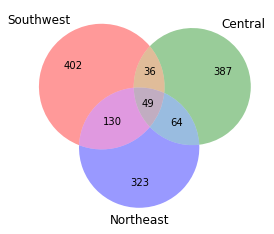

In [26]:
#Venn diagram for the 3 pops
venn3([set(South_genes_unique_list), set(Central_genes_unique_list), set(North_genes_unique_list)], set_labels = ('Southwest', 'Central', 'Northeast'))

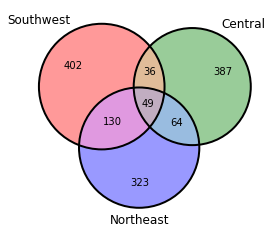

In [28]:
#Ven diagram with circles
#Venn diagram for the 3 pops
venn3([set(South_genes_unique_list), set(Central_genes_unique_list), set(North_genes_unique_list)], set_labels = ('Southwest', 'Central', 'Northeast'))

venn3_circles([set(South_genes_unique_list), set(Central_genes_unique_list), set(North_genes_unique_list)])
plt.savefig('three_pop_venn.png',transparent=True,dpi=600)

# 5. Get list of genes shared between all Pops, and list of private genes

In [22]:
#List
intersection = set.intersection(South_gene_set, Central_gene_list, North_genes_unique_list)
intersection

{'ID=Caden.01G035200.v1.1;Name=Caden.01G035200',
 'ID=Caden.01G035300.v1.1;Name=Caden.01G035300',
 'ID=Caden.01G035500.v1.1;Name=Caden.01G035500',
 'ID=Caden.01G228700.v1.1;Name=Caden.01G228700',
 'ID=Caden.01G424600.v1.1;Name=Caden.01G424600',
 'ID=Caden.01G426200.v1.1;Name=Caden.01G426200',
 'ID=Caden.02G006300.v1.1;Name=Caden.02G006300',
 'ID=Caden.02G006600.v1.1;Name=Caden.02G006600',
 'ID=Caden.02G006800.v1.1;Name=Caden.02G006800',
 'ID=Caden.03G057600.v1.1;Name=Caden.03G057600',
 'ID=Caden.03G076200.v1.1;Name=Caden.03G076200',
 'ID=Caden.03G101800.v1.1;Name=Caden.03G101800',
 'ID=Caden.03G102100.v1.1;Name=Caden.03G102100',
 'ID=Caden.03G102400.v1.1;Name=Caden.03G102400',
 'ID=Caden.03G198400.v1.1;Name=Caden.03G198400',
 'ID=Caden.03G219500.v1.1;Name=Caden.03G219500',
 'ID=Caden.03G219700.v1.1;Name=Caden.03G219700',
 'ID=Caden.04G020100.v1.1;Name=Caden.04G020100',
 'ID=Caden.04G033000.v1.1;Name=Caden.04G033000',
 'ID=Caden.04G213000.v1.1;Name=Caden.04G213000',
 'ID=Caden.05G012000

In [23]:
#To find unique genes in a population (South)
South_private_genes = []
for i in South_genes_unique_list:
    if i not in Central_genes_unique_list and i not in North_genes_unique_list:
        South_private_genes.append(i)
len(South_private_genes)
South_private_genes

['ID=Caden.05G045600.v1.1;Name=Caden.05G045600',
 'ID=Caden.07G005200.v1.1;Name=Caden.07G005200',
 'ID=Caden.09G023900.v1.1;Name=Caden.09G023900',
 'ID=Caden.03G026800.v1.1;Name=Caden.03G026800',
 'ID=Caden.12G172900.v1.1;Name=Caden.12G172900',
 'ID=Caden.05G292500.v1.1;Name=Caden.05G292500',
 'ID=Caden.04G009000.v1.1;Name=Caden.04G009000',
 'ID=Caden.12G057500.v1.1;Name=Caden.12G057500',
 'ID=Caden.06G107200.v1.1;Name=Caden.06G107200',
 'ID=Caden.11G122600.v1.1;Name=Caden.11G122600',
 'ID=Caden.11G190300.v1.1;Name=Caden.11G190300',
 'ID=Caden.11G050300.v1.1;Name=Caden.11G050300',
 'ID=Caden.12G201100.v1.1;Name=Caden.12G201100',
 'ID=Caden.05G035500.v1.1;Name=Caden.05G035500',
 'ID=Caden.04G173200.v1.1;Name=Caden.04G173200',
 'ID=Caden.11G212300.v1.1;Name=Caden.11G212300',
 'ID=Caden.06G120900.v1.1;Name=Caden.06G120900',
 'ID=Caden.12G205400.v1.1;Name=Caden.12G205400',
 'ID=Caden.04G007800.v1.1;Name=Caden.04G007800',
 'ID=Caden.09G016100.v1.1;Name=Caden.09G016100',
 'ID=Caden.11G024100

In [24]:
#To find unique genes in a population (Central)
Central_private_genes = []
for i in Central_genes_unique_list:
    if i not in South_genes_unique_list and i not in North_genes_unique_list:
        Central_private_genes.append(i)
len(Central_private_genes)
Central_private_genes

['ID=Caden.11G110900.v1.1;Name=Caden.11G110900',
 'ID=Caden.05G034500.v1.1;Name=Caden.05G034500',
 'ID=Caden.08G044400.v1.1;Name=Caden.08G044400',
 'ID=Caden.05G185300.v1.1;Name=Caden.05G185300',
 'ID=Caden.05G197000.v1.1;Name=Caden.05G197000',
 'ID=Caden.01G336800.v1.1;Name=Caden.01G336800',
 'ID=Caden.02G168700.v1.1;Name=Caden.02G168700',
 'ID=Caden.03G106100.v1.1;Name=Caden.03G106100',
 'ID=Caden.10G107700.v1.1;Name=Caden.10G107700',
 'ID=Caden.12G177600.v1.1;Name=Caden.12G177600',
 'ID=Caden.10G150200.v1.1;Name=Caden.10G150200',
 'ID=Caden.07G050400.v1.1;Name=Caden.07G050400',
 'ID=Caden.05G273900.v1.1;Name=Caden.05G273900',
 'ID=Caden.02G154400.v1.1;Name=Caden.02G154400',
 'ID=Caden.07G156400.v1.1;Name=Caden.07G156400',
 'ID=Caden.02G166300.v1.1;Name=Caden.02G166300',
 'ID=Caden.03G106200.v1.1;Name=Caden.03G106200',
 'ID=Caden.06G126700.v1.1;Name=Caden.06G126700',
 'ID=Caden.12G117700.v1.1;Name=Caden.12G117700',
 'ID=Caden.11G209900.v1.1;Name=Caden.11G209900',
 'ID=Caden.07G060000

In [25]:
#To find unique genes in a population (North)
North_private_genes = []
for i in North_genes_unique_list:
    if i not in Central_genes_unique_list and i not in South_genes_unique_list:
        North_private_genes.append(i)
len(North_private_genes)
North_private_genes

['ID=Caden.06G150000.v1.1;Name=Caden.06G150000',
 'ID=Caden.04G063600.v1.1;Name=Caden.04G063600',
 'ID=Caden.11G250000.v1.1;Name=Caden.11G250000',
 'ID=Caden.06G225700.v1.1;Name=Caden.06G225700',
 'ID=Caden.03G078700.v1.1;Name=Caden.03G078700',
 'ID=Caden.11G181600.v1.1;Name=Caden.11G181600',
 'ID=Caden.03G238100.v1.1;Name=Caden.03G238100',
 'ID=Caden.12G025900.v1.1;Name=Caden.12G025900',
 'ID=Caden.07G024900.v1.1;Name=Caden.07G024900',
 'ID=Caden.12G012600.v1.1;Name=Caden.12G012600',
 'ID=Caden.06G140800.v1.1;Name=Caden.06G140800',
 'ID=Caden.10G119700.v1.1;Name=Caden.10G119700',
 'ID=Caden.12G041000.v1.1;Name=Caden.12G041000',
 'ID=Caden.12G203400.v1.1;Name=Caden.12G203400',
 'ID=Caden.02G042300.v1.1;Name=Caden.02G042300',
 'ID=Caden.02G074600.v1.1;Name=Caden.02G074600',
 'ID=Caden.06G149900.v1.1;Name=Caden.06G149900',
 'ID=Caden.06G032400.v1.1;Name=Caden.06G032400',
 'ID=Caden.05G287000.v1.1;Name=Caden.05G287000',
 'ID=Caden.01G096000.v1.1;Name=Caden.01G096000',
 'ID=Caden.02G018000

# 6. Make bar chart of most common gene families for each populations